<a href="https://colab.research.google.com/github/balamurugan-palaniappan-CEP/AIML_CEP_2021/blob/main/Ensemble%20Methods/EnsembleMethods_TA_session_13Nov2021_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\Large{\text{Ensemble methods}}$ 

In [ ]:
import numpy as np #numpy package will be useful for most of the array operations in the code 
# from sklearn.datasets import load_wine

In [ ]:
"""
Loading data set
"""
from sklearn.datasets import load_svmlight_file

myfeature, y = load_svmlight_file('diabetes')

"""
converting sparse matrix myfeature (which is in tuple form) to a dense matrix
"""

X = myfeature.todense()
X = np.array(X)
# print (y)
# print (X[0])

In [ ]:
#Let us print the contents of the X_y variable 

print(type(X))
# print(X_y)

<class 'numpy.ndarray'>


In [ ]:
#So we found that the X_y variable is of type sklearn.utils.bunch
#further, we see that the X_y variable consists of dictionary-type structures named "data",  "target" and "target_names"

# Let us now segregate the data attributes and class labels into separate variables 

# X = X_y.data
# y = X_y.target

print('X shape:', X.shape, 'type(X):', type(X) )
print(' y shape:', y.shape, ' type(y):', type(y))

X shape: (768, 8) type(X): <class 'numpy.ndarray'>
 y shape: (768,)  type(y): <class 'numpy.ndarray'>


In [ ]:
#Thus we see that X and y are numpy ndarrays. 
#We can print the unique labels available in y 
print(np.unique(y))
# print (y)

[-1.  1.]


Consider an input space $\mathcal{X} \subseteq {\mathbb{R}}^d$ and the output space $\mathcal{Y} = \{+1,-1\}$. Assume a fixed (but unknown) distribution $P(X,Y)$ over $\mathcal{X} \times \mathcal{Y}$. 

Let us assume that there are 15 base classifiers $C_1, C_2, \ldots, C_{15},$ where each classifier has an error rate of $\epsilon = 0.25$ on some sample from a fixed data distribution $P(X,Y)$. 

To predict the label for a test sample $\hat{x}$, we adopt the following inference procedure (called $\textbf{Ensemble Classifier}(\textbf{EC})$):

1.   Predict $C_i(\hat{x})$ using each classifier $C_i, \ i \in \{1,2,\ldots,15\}$.
2.   Predict the final label $\hat{y} = \arg\max_{y \in \mathcal{Y}} \sum_{i=1}^{15} \delta(y==C_i(\hat{x}))$ where $\delta(p)$ is the indicator function given by:

  $
  \delta(p) = 
  \begin{cases}
  1 \text{ if } p \text{ is true. } \\ 
  0 \text{ if } p \text{ is false. }  
  \end{cases}
  $



$\textbf{Question:}$ What would be error rate of the classifier obtained from the above inference algorithm $\textbf{EC}$? 

$\textbf{One possible answer:}$

Suppose the classifiers are assumed to be independent, then the $\textbf{EC}$ classifier would make an error only when more than half of the classifiers (i.e. more than 7 classifiers) make error in the prediction. Hence  we may write the error rate of $\textbf{EC}$ as:

$
\begin{align}
\text{error}_{\textbf{EC}} = \sum_{i=8}^{15} \begin{pmatrix} 15 \\  i \end{pmatrix} {\epsilon}^{i} (1-\epsilon)^{15-i} 
\end{align}
$

which is approximately $0.017$. Note that this error rate is considerably smaller than the individual error rates of the classifiers. 

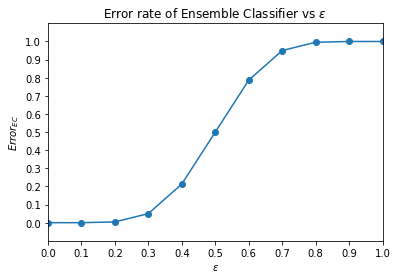

In [ ]:
#compute the error rates of EC for different error rates of C_i
import math 
import matplotlib.pyplot as plt

def comb(n, k):
    return math.factorial(n) // math.factorial(k) // math.factorial(n - k)


epsilons = np.linspace(0,1,11)
errors = np.zeros(epsilons.shape)

num_classifiers = 15
eps_idx=0
for epsilon in epsilons:
  error_EC = 0
  for j in np.arange(np.ceil(num_classifiers/2),num_classifiers+1):
    err = comb(num_classifiers,j)*math.pow(epsilon,j)*math.pow(1-epsilon,num_classifiers-j)
    error_EC += err
  errors[eps_idx] = error_EC
  eps_idx+=1 


figure, ax = plt.subplots(1) 

plt.plot(epsilons, errors, marker='o')
ax.set_xlabel('$\epsilon$')
ax.set_ylabel('$Error_{EC}$')
ax.set_xlim(0, 1)
ax.set_ylim(errors.min()-0.1,errors.max()+0.1)
ax.set_xticks(epsilons)
ax.set_yticks(np.linspace(0,1,11))
ax.set_title('Error rate of Ensemble Classifier vs $\epsilon$')
plt.show()


$\textbf{Important to note:}$ 



1.   The base classifiers $C_1, C_2, \ldots, C_{15}$ are assumed to be independent. 
2.   The error rate $\epsilon$ of each base classifier must be less than $0.5$ for the ensemble classifier to behave better. $\textbf{What is meant by a base classifier having an error rate less than } 0.5$?



$\large{\text{Ways of building an ensemble classifier}}$

$\textbf{Create multiple data partitions from training data}$

1.   Resample the original training data $D$ (using sampling with replacement) and create different data paritions $D_1, D_2, \ldots, D_M$. 
2.   Train different classifiers $C_i$ on respective data partition $D_i$, $i \in \{1,2,\ldots,M\}$.
3.   For a test data point $\hat{x}$ predict the label $\hat{y}=\text{MajorityVote}(C_1(\hat{x}),C_2(\hat{x}), \ldots, C_M(\hat{x}))$.  







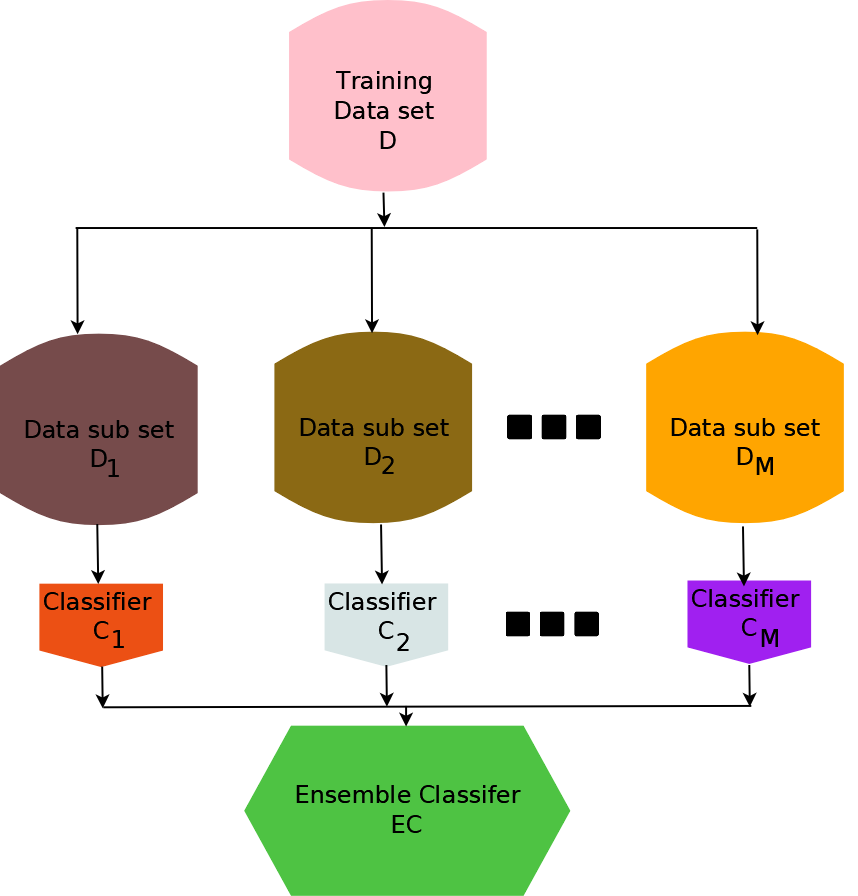

In [ ]:
from urllib.request import urlopen
from PIL import Image

img = Image.open(urlopen('https://github.com/balamurugan-palaniappan-CEP/AIML_CEP_2021/raw/main/images/ensemble_classifier.png'))
img

In [ ]:
np.random.seed(1000)
#Create an index array 
num_samples = X.shape[0]
# print (num_samples)
indexarr = np.arange(num_samples) #index array
np.random.shuffle(indexarr) #shuffle the indices 
#print('shuffled indices of samples:')
#print(indexarr)

In [ ]:
#Use the samples corresponding to first 60% of indexarr for training 
num_train = int(0.8*num_samples)
#Use the remaining 20% samples for testing 
num_test = num_samples-num_train
print('num_train: ',num_train, 'num_test: ', num_test)

num_train:  614 num_test:  154


In [ ]:
#Use the first 80% of indexarr to create the train data features and train labels 
train_X = X[indexarr[0:num_train]]
train_y = y[indexarr[0:num_train]]
print('shape of train data features:')
print(train_X.shape)
print('shape of train data labels')
print(train_y.shape)

shape of train data features:
(614, 8)
shape of train data labels
(614,)


In [ ]:
#Use remaining 20% of indexarr to create the test data and test labels  
test_X = X[indexarr[num_train:num_samples]]
test_y = y[indexarr[num_train:num_samples]]
print('shape of test data features:')
print(test_X.shape)
print('shape of test data labels')
print(test_y.shape)

shape of test data features:
(154, 8)
shape of test data labels
(154,)


In [ ]:
#Let us now use five different base classifiers 
from sklearn.svm import LinearSVC #import linear SVM
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree #decision tree from scikit learn 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# creating an object of LogisticRegression class

clf_list = [] 

clf_linearsvc = LinearSVC(C=0.01)
clf_neigh = KNeighborsClassifier(n_neighbors=3, metric='manhattan') #weights='uniform' (default) or 'distance'
clf_svc = SVC(kernel='rbf', gamma=0.01)
clf_tree = tree.DecisionTreeClassifier(criterion='gini')
clf_logit = LogisticRegression(C=1.0) # C is set to be large number in order to remove the inbuilt regularization 

clf_list.append(clf_linearsvc)
clf_list.append(clf_neigh)
clf_list.append(clf_svc)
clf_list.append(clf_tree)
clf_list.append(clf_logit)

clf_names = ['Linear SVM','Nearest Neighbors', 'Kernel SVM','Decision Tree','Logistic Regression']
num_classifiers = 5


for i in range(num_classifiers):
  print('classifier:',clf_list[i])
  indexarr = np.arange(train_X.shape[0]) #index array for train data
  np.random.shuffle(indexarr) #shuffle the indices 
  #we shall choose 70% of the data
  partition_prop = 0.7
  num_samples_partition = int(partition_prop*train_X.shape[0])

  X_partition = train_X[indexarr[0:num_samples_partition]]
  y_partition = train_y[indexarr[0:num_samples_partition]]

  base_clf = clf_list[i] 
  base_clf_model = base_clf.fit(X_partition,y_partition.ravel())


  #test accuracy
  from sklearn.metrics import accuracy_score
  test_y_predicted = base_clf_model.predict(test_X)
  test_acc = accuracy_score(test_y, test_y_predicted)
  print('test accuracy from classifier:',clf_names[i],' is:', test_acc)

  if i == 0:
    test_pred_all_clf = base_clf_model.predict(test_X)

  elif i ==1:
    test_pred_all_clf = np.column_stack( (test_pred_all_clf,test_y_predicted) )

  elif i==2:
    test_pred_all_clf = np.column_stack( (test_pred_all_clf,test_y_predicted) )
  
  elif i ==3:
    test_pred_all_clf = np.column_stack( (test_pred_all_clf,test_y_predicted) )

  elif i ==4:
    test_pred_all_clf = np.column_stack( (test_pred_all_clf,test_y_predicted) )


classifier: LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
test accuracy from classifier: Linear SVM  is: 0.7077922077922078
classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
test accuracy from classifier: Nearest Neighbors  is: 0.6753246753246753
classifier: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
test accuracy from classifier: Kernel SVM  is: 0.6428571428571429
classifier: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
       

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
test_pred_all_clf = np.array(test_pred_all_clf)
print(test_pred_all_clf.shape)

(154, 5)


In [ ]:
## test predictions by 5 base classifiers. The last column contains actual test label. 
print(np.column_stack( (test_pred_all_clf, test_y)) )

[[ 1.  1.  1.  1. -1.  1.]
 [ 1. -1.  1. -1.  1. -1.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 1. -1.  1.  1. -1.  1.]
 [ 1.  1.  1. -1.  1. -1.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 1.  1. -1.  1.  1.  1.]
 [ 1. -1.  1.  1.  1.  1.]
 [ 1. -1.  1.  1. -1. -1.]
 [ 1.  1.  1. -1.  1.  1.]
 [-1. -1. -1. -1. -1.  1.]
 [ 1.  1.  1.  1.  1. -1.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1. -1.  1.  1.]
 [ 1.  1.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]
 [-1. -1.  1. -1. -1.  1.]
 [ 1. -1.  1. -1.  1. -1.]
 [ 1.  1.  1. -1.  1.  1.]
 [ 1.  1.  1.  1.  1. -1.]
 [ 1. -1.  1. -1.  1.  1.]
 [ 1. -1.  1. -1. -1. -1.]
 [ 1. -1.  1. -1.  1. -1.]
 [ 1. -1.  1. -1.  1.  1.]
 [-1. -1.  1. -1. -1. -1.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 1. -1. -1.  1.  1.  1.]
 [ 1. -1.  1.  1. -1. -1.]
 [ 1.  1.  1.  1. -1.  1.]
 [ 1. -1.  1. -1. -1. -1.]
 [ 1.  1.  1.  1.  1.  1.]
 

In [ ]:

from scipy import stats

test_pred_all_clf = test_pred_all_clf.astype(int)

test_pred, counts = stats.mode(test_pred_all_clf, axis=1)
test_acc = accuracy_score(test_y, test_pred)
print('test accuracy from ensemble classifier is:', test_acc)




test accuracy from ensemble classifier is: 0.6883116883116883


In [ ]:
## creating confusing matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, test_pred)
print(cm)


[[24 28]
 [19 83]]


[Text(0, 0.5, '-1'), Text(0, 1.5, '1')]

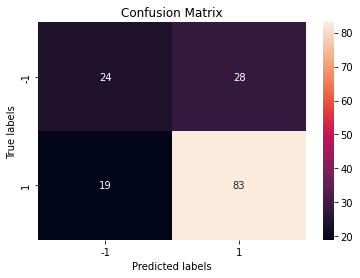

In [ ]:
#Plotting the confusion matrix for better interpretation
import seaborn as sns
import matplotlib.pyplot as plt
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['-1', '1'])
ax.yaxis.set_ticklabels(['-1', '1'])

$\large{\text{Ways of building an ensemble classifier}}$

$\textbf{Create multiple attribute partitions from training data}$

1.   Resample the attributes from original training data $D$ (using sampling with replacement) and create different feature paritions $F_1, F_2, \ldots, F_M$. Note that the number of samples in these partitions might be same as that in $D$ or might be different.
2.   Train different classifiers $C_i$ on respective feature partition $F_i$, $i \in \{1,2,\ldots,M\}$.
3.   For a test data point $\hat{x}$ first create feature partitions based on $F_1, F_2, \ldots, F_M$ and predict the label $\hat{y}=\text{MajorityVote}(C_1(F_1(\hat{x})),C_2(F_2(\hat{x})), \ldots, C_M(F_M(\hat{x})))$.  


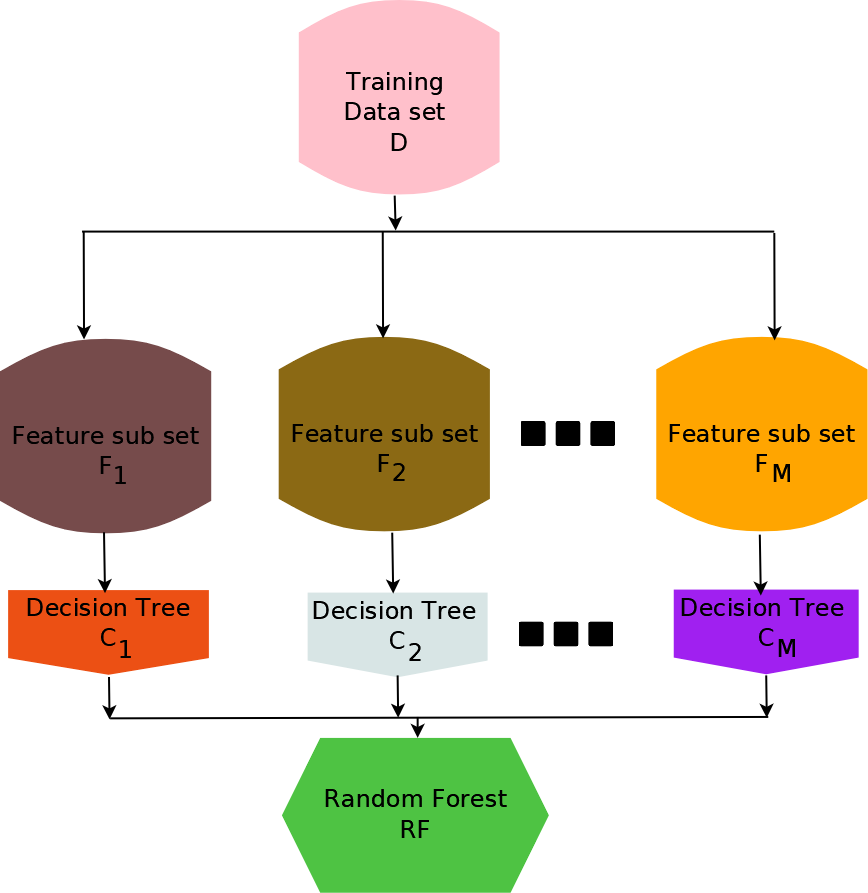

In [ ]:
from urllib.request import urlopen
from PIL import Image

img = Image.open(urlopen('https://github.com/balamurugan-palaniappan-CEP/AIML_CEP_2021/raw/main/images/ensemble_classifier_RF.png'))
img

In [ ]:
#Let us now use three different base classifiers and check the decision boundary 
from sklearn.ensemble import RandomForestClassifier

clf_list = [] 

clf_linearsvc = LinearSVC(C=1.0)
clf_neigh = KNeighborsClassifier(n_neighbors=2, metric='manhattan') #weights='uniform' (default) or 'distance'
clf_svc = SVC(kernel='rbf', gamma=0.01)
# clf_tree = tree.DecisionTreeClassifier(criterion='entropy')
clf_rf = RandomForestClassifier(n_estimators = 100,  random_state=0)
clf_logit = LogisticRegression(C=1.0) # C is set to be large number in order to remove the inbuilt regularization 

clf_list.append(clf_linearsvc)
clf_list.append(clf_neigh)
clf_list.append(clf_svc)
clf_list.append(clf_logit)
clf_list.append(clf_rf)

clf_names = ['Linear SVM','Nearest Neighbors', 'Kernel SVM','Logistic Regression','Random Forest']
num_classifiers = 5


for i in range(num_classifiers):
  print('classifier:',clf_list[i])
  indexarr = np.arange(train_X.shape[0]) #index array for train data
  np.random.shuffle(indexarr) #shuffle the indices 
  #we shall choose 70% of the data
  partition_prop = 0.7
  num_samples_partition = int(partition_prop*train_X.shape[0])

  X_partition = train_X[indexarr[0:num_samples_partition]]
  y_partition = train_y[indexarr[0:num_samples_partition]]

  base_clf = clf_list[i] 
  base_clf_model = base_clf.fit(X_partition,y_partition.ravel())


  #test accuracy
  from sklearn.metrics import accuracy_score
  test_y_predicted = base_clf_model.predict(test_X)
  test_acc = accuracy_score(test_y, test_y_predicted)
  print('test accuracy from classifier:',clf_names[i],' is:', test_acc)

  if i == 0:
    test_pred_all_clf = base_clf_model.predict(test_X)

  elif i ==1:
    test_pred_all_clf = np.column_stack( (test_pred_all_clf,test_y_predicted) )

  elif i==2:
    test_pred_all_clf = np.column_stack( (test_pred_all_clf,test_y_predicted) )
  
  elif i ==3:
    test_pred_all_clf = np.column_stack( (test_pred_all_clf,test_y_predicted) )

  elif i ==4:
    test_pred_all_clf = np.column_stack( (test_pred_all_clf,test_y_predicted) )

classifier: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
test accuracy from classifier: Linear SVM  is: 0.6818181818181818
classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
test accuracy from classifier: Nearest Neighbors  is: 0.6038961038961039
classifier: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
test accuracy from classifier: Kernel SVM  is: 0.6493506493506493
classifier: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
      

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


test accuracy from classifier: Random Forest  is: 0.6818181818181818


In [ ]:
test_pred_all_clf = np.array(test_pred_all_clf)
print(test_pred_all_clf.shape)

from scipy import stats

test_pred_all_clf = test_pred_all_clf.astype(int)

test_pred, counts = stats.mode(test_pred_all_clf, axis=1)
test_acc = accuracy_score(test_y, test_pred)
print('test accuracy from ensemble classifier is:', test_acc)



(154, 5)
test accuracy from ensemble classifier is: 0.6883116883116883


In [ ]:
## creating confusing matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, test_pred)
print(cm)


[[25 27]
 [21 81]]


[Text(0, 0.5, '-1'), Text(0, 1.5, '1')]

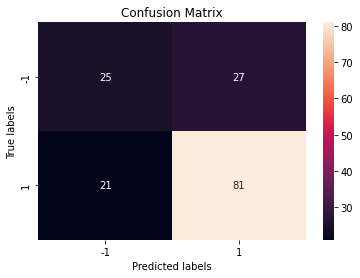

In [ ]:
#Plotting the confusion matrix for better interpretation
import seaborn as sns
import matplotlib.pyplot as plt
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['-1', '1'])
ax.yaxis.set_ticklabels(['-1', '1'])

#Exercise:
Use an ensemble method with classifiers as linear SVMs with different C values (C= 0.1, 0.01, 0.001, 0.0001) to train on diabetes dataset.